In [1]:
import pandas as pd 

data = pd.read_csv('../Data/data_tm_final.csv', index_col=False)

In [2]:
data

,fecha,fechaHoraLecturaDato,NombreParada,nombre_ruta,numero_estacion,latitud_parada,longitud_parada,latitud_parada0,longitud_parada0,latitud_parada25,longitud_parada25,latitud_parada50,longitud_parada50,latitud_parada75,longitud_parada75,latitud_parada100,longitud_parada100,estimacionOcupacionAbordo
0,2023-10-23,08:33:21,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,-74.079321,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,16
1,2023-10-23,19:42:59,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,-74.079321,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,42
2,2023-10-23,12:09:07,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,-74.079321,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,0
3,2023-10-23,17:59:04,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,-74.079321,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,160
4,2023-10-23,18:26:25,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,-74.079321,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170897,2023-10-27,20:57:18,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,-74.077663,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,81
170898,2023-10-27,14:29:38,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,-74.077663,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,149
170899,2023-10-27,10:43:36,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,-74.077663,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,74
170900,2023-10-27,12:36:03,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,-74.077663,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,118


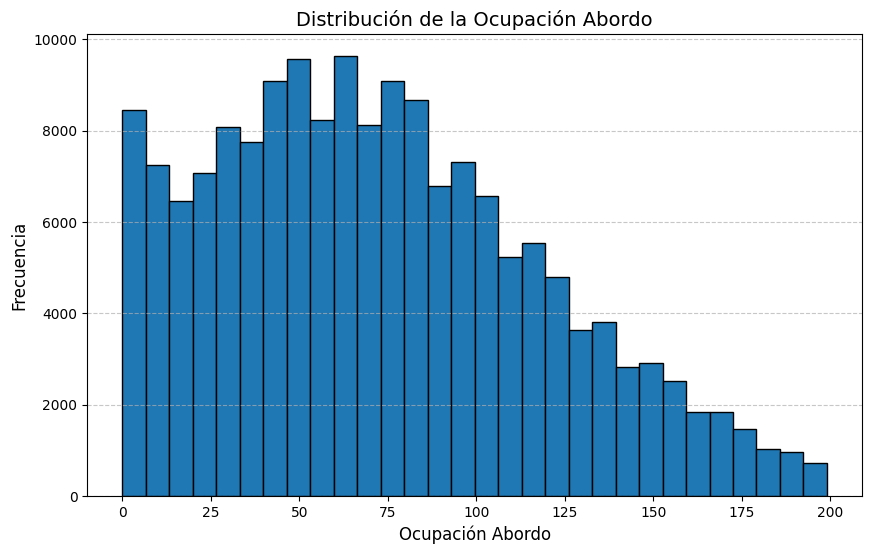

In [6]:
import matplotlib.pyplot as plt

# Convertir columnas de fecha y hora en formato datetime para análisis
data['fechaHoraLecturaDato'] = pd.to_datetime(data['fechaHoraLecturaDato'], format='%H:%M:%S')
data['hora'] = data['fechaHoraLecturaDato'].dt.hour  # Extraer la hora para análisis horario

# Resumen estadístico del campo de ocupación
ocupacion_summary = data['estimacionOcupacionAbordo'].describe()

# Distribución de la ocupación
plt.figure(figsize=(10, 6))
plt.hist(data['estimacionOcupacionAbordo'], bins=30, edgecolor='black')
plt.title('Distribución de la Ocupación Abordo', fontsize=14)
plt.xlabel('Ocupación Abordo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [4]:
# Eliminar outliers

data = data[data['estimacionOcupacionAbordo'] < 200].copy()

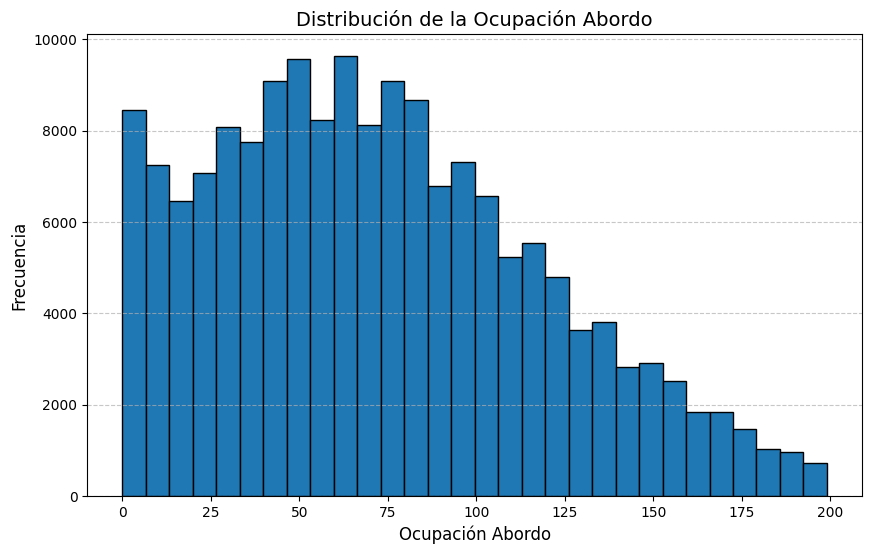

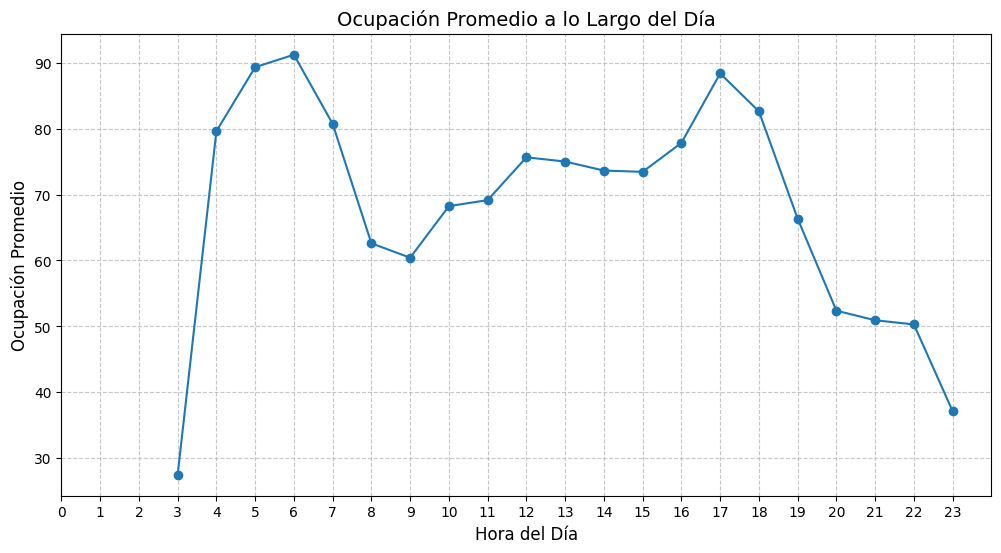

count    167247.000000
mean         72.869624
std          45.860179
min           0.000000
25%          37.000000
50%          68.000000
75%         104.000000
max         199.000000
Name: estimacionOcupacionAbordo, dtype: float64

In [5]:
import matplotlib.pyplot as plt

# Convertir columnas de fecha y hora en formato datetime para análisis
data['fechaHoraLecturaDato'] = pd.to_datetime(data['fechaHoraLecturaDato'], format='%H:%M:%S')
data['hora'] = data['fechaHoraLecturaDato'].dt.hour  # Extraer la hora para análisis horario

# Resumen estadístico del campo de ocupación
ocupacion_summary = data['estimacionOcupacionAbordo'].describe()

# Distribución de la ocupación
plt.figure(figsize=(10, 6))
plt.hist(data['estimacionOcupacionAbordo'], bins=30, edgecolor='black')
plt.title('Distribución de la Ocupación Abordo', fontsize=14)
plt.xlabel('Ocupación Abordo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Ocupación promedio por hora
ocupacion_horaria = data.groupby('hora')['estimacionOcupacionAbordo'].mean()

# Comportamiento horario
plt.figure(figsize=(12, 6))
plt.plot(ocupacion_horaria.index, ocupacion_horaria.values, marker='o')
plt.title('Ocupación Promedio a lo Largo del Día', fontsize=14)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Ocupación Promedio', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.show()

# Mostrar resumen estadístico
ocupacion_summary

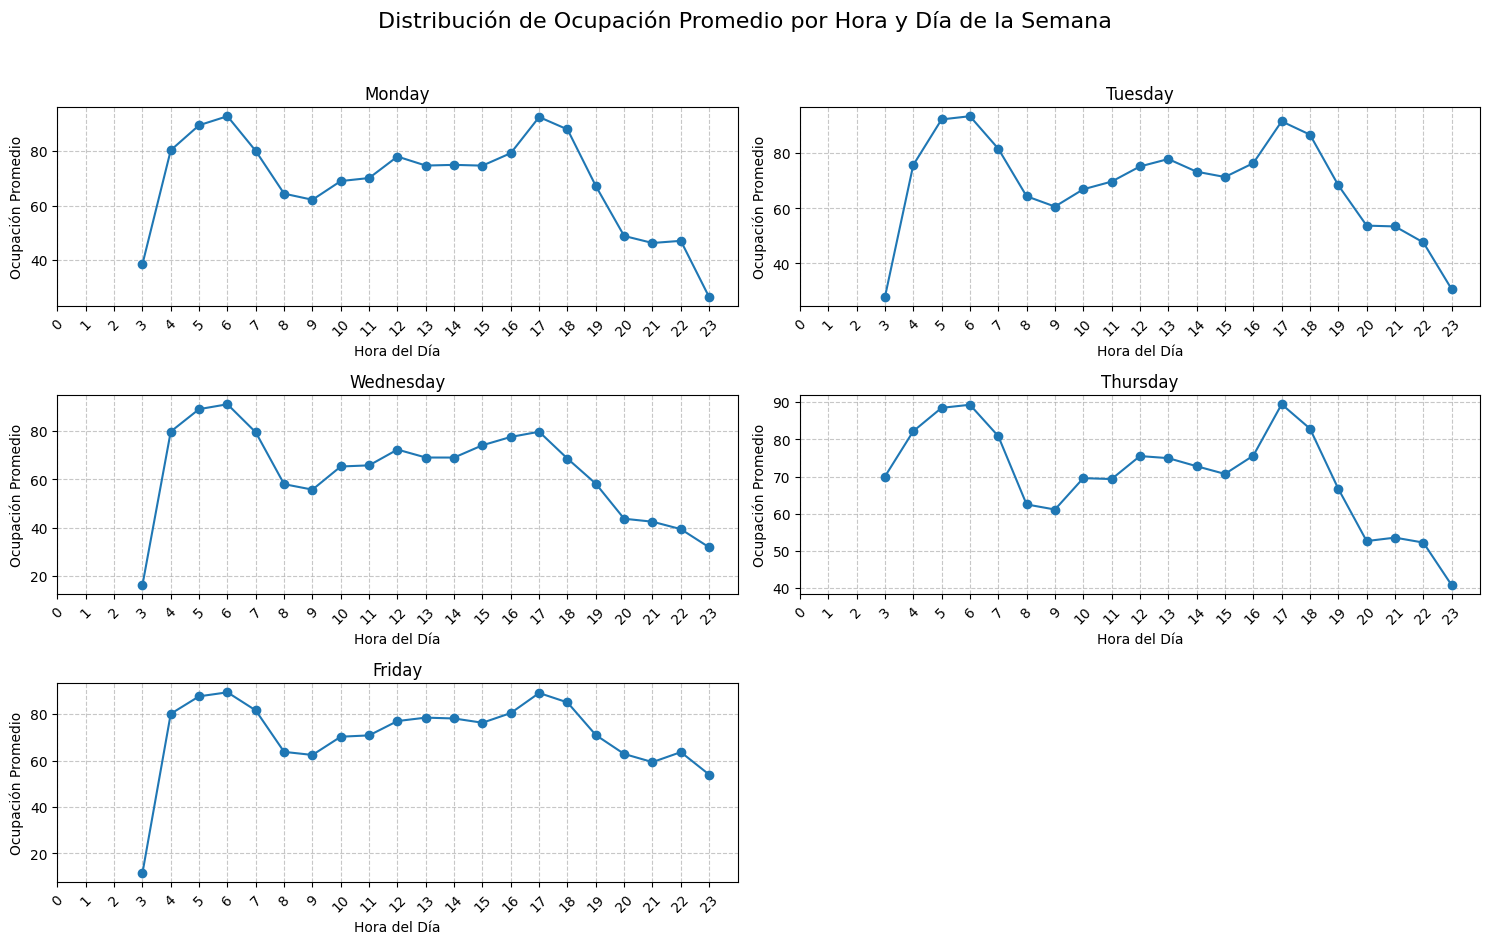

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Asegurarnos de que 'fecha' está en formato de fecha y extraer el día de la semana
data['fecha'] = pd.to_datetime(data['fecha'])
data['dia_semana'] = data['fecha'].dt.day_name()

# Crear un DataFrame con la ocupación promedio por hora para cada día de la semana
ocupacion_horaria_dia = data.groupby(['dia_semana', 'hora'])['estimacionOcupacionAbordo'].mean().unstack(level=0)

# Ordenar días de la semana para mayor claridad
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
ocupacion_horaria_dia = ocupacion_horaria_dia[dias_ordenados]

# Configuración de subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 12))  # Crear una cuadrícula de subplots 4x2
axes = axes.flatten()  # Convertir en un array para iterar

for i, dia in enumerate(dias_ordenados):
    if i < len(axes):  # Verificar si hay suficientes subplots
        ax = axes[i]
        ax.plot(ocupacion_horaria_dia.index, ocupacion_horaria_dia[dia], marker='o')
        ax.set_title(dia, fontsize=12)
        ax.set_xlabel('Hora del Día', fontsize=10)
        ax.set_ylabel('Ocupación Promedio', fontsize=10)
        ax.grid(linestyle='--', alpha=0.7)
        ax.set_xticks(range(0, 24))
        ax.set_xticklabels(range(0, 24), rotation=45)

# Eliminar subplots vacíos si hay menos días que subplots
for j in range(len(dias_ordenados), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Distribución de Ocupación Promedio por Hora y Día de la Semana', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar diseño para evitar superposición
plt.show()

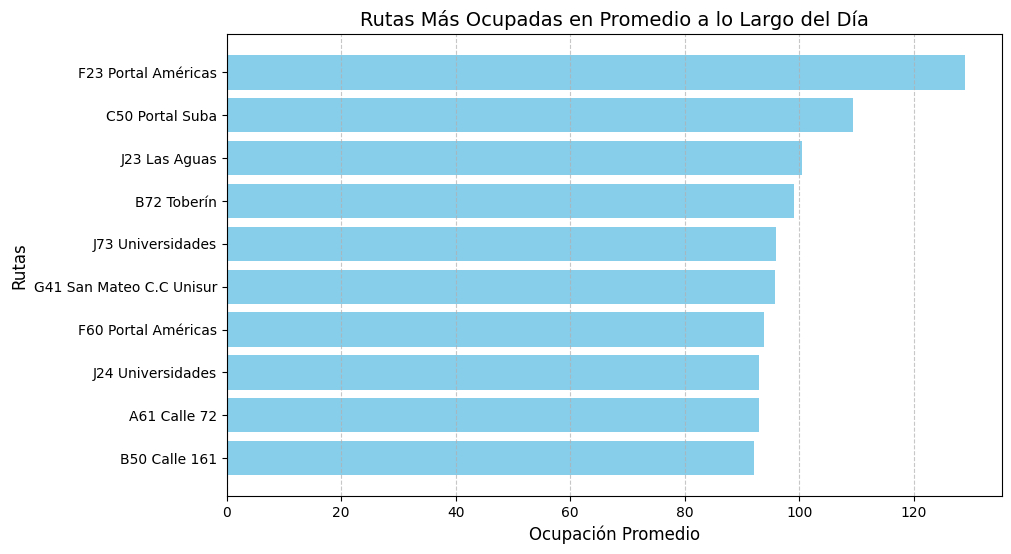

In [12]:
# Agrupar por nombre de ruta y calcular la ocupación promedio
ocupacion_rutas = data.groupby('nombre_ruta')['estimacionOcupacionAbordo'].mean().sort_values(ascending=False)

# Crear un DataFrame para las rutas más ocupadas
ocupacion_rutas_df = ocupacion_rutas.reset_index()
ocupacion_rutas_df.columns = ['nombre_ruta', 'ocupacion_promedio']

# Mostrar las 10 rutas más ocupadas
top_rutas = ocupacion_rutas_df.head(10)
top_rutas

plt.figure(figsize=(10, 6))
plt.barh(top_rutas['nombre_ruta'], top_rutas['ocupacion_promedio'], color='skyblue')
plt.gca().invert_yaxis()  # Invertir el eje para mostrar las rutas más ocupadas en la parte superior
plt.title('Rutas Más Ocupadas en Promedio a lo Largo del Día', fontsize=14)
plt.xlabel('Ocupación Promedio', fontsize=12)
plt.ylabel('Rutas', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

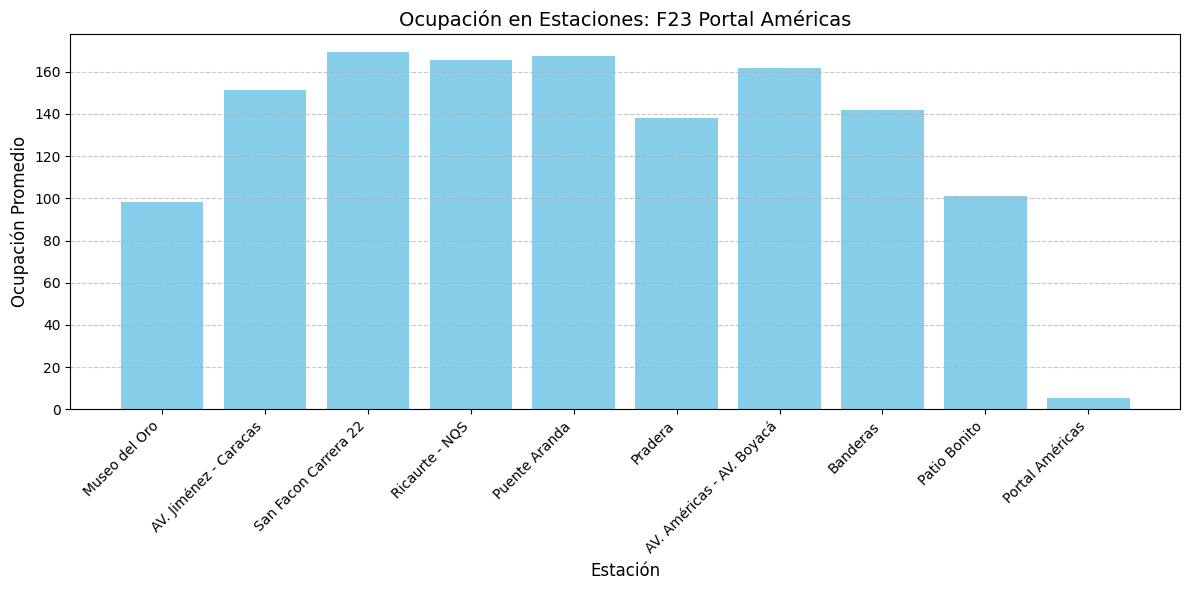

In [31]:
# Filtrar solo la ruta C50 Portal Suba
ruta_seleccionada = 'F23 Portal Américas'
data_filtrada = data[data['nombre_ruta'] == ruta_seleccionada]

# Agrupar por número de estación y nombre de parada, calculando el promedio de ocupación
ocupacion_estaciones = data_filtrada.groupby(['numero_estacion', 'NombreParada'])['estimacionOcupacionAbordo'].mean().reset_index()

# Ordenar los datos por número de estación
ocupacion_estaciones = ocupacion_estaciones.sort_values(by='numero_estacion')

# Crear un gráfico de barras para la ruta seleccionada
plt.figure(figsize=(12, 6))
plt.bar(ocupacion_estaciones['NombreParada'], ocupacion_estaciones['estimacionOcupacionAbordo'], color='skyblue')
plt.title(f'Ocupación en Estaciones: {ruta_seleccionada}', fontsize=14)
plt.xlabel('Estación', fontsize=12)
plt.ylabel('Ocupación Promedio', fontsize=12)
plt.xticks(range(len(ocupacion_estaciones['NombreParada'])), ocupacion_estaciones['NombreParada'], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
import folium

# Filtrar las franjas horarias específicas
data_filtrada['franja_horaria'] = pd.cut(
    data_filtrada['hora'], 
    bins=[0, 4, 7, 17, 24], 
    labels=['0-4am', '4-7am', '5-6pm', '6-11pm'], 
    right=False
)
franjas_interes = ['4-7am', '5-6pm']
data_franjas = data_filtrada[data_filtrada['franja_horaria'].isin(franjas_interes)]

# Definir función para asignar colores por percentiles
def get_color(value, percentiles):
    if value <= percentiles[0]:
        return '#ff0000'  # Rojo (baja ocupación)
    elif value <= percentiles[1]:
        return '#ff8080'  # Rosa claro
    elif value <= percentiles[2]:
        return '#ffffff'  # Blanco (ocupación media)
    elif value <= percentiles[3]:
        return '#80ff80'  # Verde claro
    else:
        return '#006400'  # Verde (alta ocupación)

# Crear mapas por ruta y franja horaria
maps = {}
for franja in franjas_interes:
    for ruta in rutas_seleccionadas:
        franja_data = data_franjas[(data_franjas['franja_horaria'] == franja) & (data_franjas['nombre_ruta'] == ruta)]
        
        # Agrupar por parada y calcular ocupación promedio
        franja_grouped = franja_data.groupby(['NombreParada', 'latitud_parada', 'longitud_parada'])['estimacionOcupacionAbordo'].mean().reset_index()
        
        # Excluir filas con NaN
        franja_grouped = franja_grouped.dropna(subset=['latitud_parada', 'longitud_parada'])
        
        # Calcular percentiles para la ocupación promedio
        if not franja_grouped.empty:  # Verificar que haya datos
            percentiles = franja_grouped['estimacionOcupacionAbordo'].quantile([0.2, 0.4, 0.6, 0.8]).values
            
            # Crear el mapa
            franja_map = folium.Map(
                location=[franja_grouped['latitud_parada'].mean(), franja_grouped['longitud_parada'].mean()], 
                zoom_start=12
            )
            
            # Añadir puntos al mapa
            for _, row in franja_grouped.iterrows():
                color = get_color(row['estimacionOcupacionAbordo'], percentiles)
                
                folium.CircleMarker(
                    location=[row['latitud_parada'], row['longitud_parada']],
                    radius=8,
                    color=color,
                    fill=True,
                    fill_opacity=0.7,
                    popup=f"{row['NombreParada']}: {row['estimacionOcupacionAbordo']:.2f}"
                ).add_to(franja_map)
            
            # Guardar el mapa
            maps[(franja, ruta)] = franja_map

# Mostrar los mapas
for (franja, ruta), mapa in maps.items():
    print(f"Mapa de la ruta {ruta} en la franja horaria {franja}")
    display(mapa)

Mapa de la ruta F23 Portal Américas en la franja horaria 5-6pm


/var/folders/2c/j4kc42250j3gmnrnhq7lphd80000gq/T/ipykernel_18271/1200845242.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['franja_horaria'] = pd.cut(


Mapa de la ruta C50 Portal Suba en la franja horaria 5-6pm


In [8]:
import folium
import numpy as np

# Función para filtrar datos por franja horaria
def filtrar_por_franja(data, inicio, fin):
    return data[(data['hora'] >= inicio) & (data['hora'] < fin)]

# Función para crear un mapa de calor
def crear_mapa_calor(data, titulo):
    mapa = folium.Map(location=[data['latitud_parada'].mean(), data['longitud_parada'].mean()], zoom_start=12)
    for _, row in data.iterrows():
        folium.CircleMarker(
            location=(row['latitud_parada'], row['longitud_parada']),
            radius=5,
            color="red",
            fill=True,
            fill_opacity=0.7,
            popup=f"Ocupación: {row['estimacionOcupacionAbordo']}"
        ).add_to(mapa)
    return mapa

# Crear mapas por franjas horarias
franjas = {
    "4-7am": (4, 7),
    "8am-3pm": (8, 15),
    "3-6pm": (15, 18),
    "7-11pm": (19, 23)
}

mapas = {}
for franja, (inicio, fin) in franjas.items():
    datos_franja = filtrar_por_franja(data, inicio, fin)
    mapas[franja] = crear_mapa_calor(datos_franja, franja)

mapas


/Users/juan.pinto/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


{'4-7am': <folium.folium.Map at 0x134e7cd60>,
 '8am-3pm': <folium.folium.Map at 0x134e7c100>,
 '3-6pm': <folium.folium.Map at 0x135106e80>,
 '7-11pm': <folium.folium.Map at 0x134fefd60>}

In [9]:
import folium
from matplotlib import cm

# Crear una copia de los datos para trabajar con las franjas horarias
data['franja_horaria'] = pd.cut(data['hora'], 
                                bins=[0, 4, 8, 16, 18, 24], 
                                labels=['0-4am', '4-8am', '8am-4pm', '4-6pm', '6-11pm'],
                                right=False)

# Filtrar franjas horarias relevantes
franjas_interes = ['4-8am', '8am-4pm', '4-6pm', '6-11pm']
data_franjas = data[data['franja_horaria'].isin(franjas_interes)]

# Definir función para asignar colores por percentiles
def get_color(value, percentiles):
    if value <= percentiles[0]:
        return '#ff0000'  # Rojo (baja ocupación)
    elif value <= percentiles[1]:
        return '#ff8080'  # Rosa claro
    elif value <= percentiles[2]:
        return '#ffffff'  # Blanco (ocupación media)
    elif value <= percentiles[3]:
        return '#80ff80'  # Verde claro
    else:
        return '#006400'  # Verde (alta ocupación)

# Crear mapas por cada franja horaria
maps = {}
for franja in franjas_interes:
    franja_data = data_franjas[data_franjas['franja_horaria'] == franja]
    
    # Agrupar por parada y calcular ocupación promedio
    franja_grouped = franja_data.groupby(['NombreParada', 'latitud_parada', 'longitud_parada'])['estimacionOcupacionAbordo'].mean().reset_index()
    
    # Calcular percentiles para la ocupación promedio
    percentiles = franja_grouped['estimacionOcupacionAbordo'].quantile([0.2, 0.4, 0.6, 0.8]).values
    
    # Crear el mapa
    franja_map = folium.Map(location=[franja_grouped['latitud_parada'].mean(), franja_grouped['longitud_parada'].mean()], zoom_start=12)
    
    # Añadir puntos al mapa
    for _, row in franja_grouped.iterrows():
        color = get_color(row['estimacionOcupacionAbordo'], percentiles)
        
        folium.CircleMarker(
            location=[row['latitud_parada'], row['longitud_parada']],
            radius=8,
            color=color,
            fill=True,
            fill_opacity=0.7,
            popup=f"{row['NombreParada']}: {row['estimacionOcupacionAbordo']:.2f}"
        ).add_to(franja_map)
    
    maps[franja] = franja_map  # Guardar el mapa

# Mostrar mapas
for franja, mapa in maps.items():
    print(f"Mapa de la franja horaria: {franja}")
    display(mapa)

Mapa de la franja horaria: 4-8am


Mapa de la franja horaria: 8am-4pm


Mapa de la franja horaria: 4-6pm


Mapa de la franja horaria: 6-11pm


# Commute

In [178]:
maps['4-8am']

In [180]:
maps['4-6pm']

In [181]:
# Convertir 'fechaHoraLecturaDato' a datetime para extraer las horas si aún no se ha hecho
if 'hora' not in data.columns:
    data['fechaHoraLecturaDato'] = pd.to_datetime(data['fechaHoraLecturaDato'], format='%H:%M:%S', errors='coerce')
    data['hora'] = data['fechaHoraLecturaDato'].dt.hour

# Agrupar por 'hora', 'latitud_parada', y 'longitud_parada', y sumar la ocupación
grouped_data = data.groupby(['hora', 'latitud_parada', 'longitud_parada'], as_index=False)['estimacionOcupacionAbordo'].sum()

# Selección de columnas relevantes para la nueva matriz de correlación
correlation_columns_grouped = ['hora', 'latitud_parada', 'longitud_parada', 'estimacionOcupacionAbordo']
correlation_data_grouped = grouped_data[correlation_columns_grouped]

# Calcular la matriz de correlación
correlation_matrix_grouped = correlation_data_grouped.corr()

# Mantener solo la parte inferior de la matriz de correlación
mask_grouped = np.triu(np.ones_like(correlation_matrix_grouped, dtype=bool))
lower_triangle_matrix_grouped = correlation_matrix_grouped.mask(mask_grouped)

# Mostrar la matriz de correlación truncada
lower_triangle_matrix_grouped

,hora,latitud_parada,longitud_parada,estimacionOcupacionAbordo
hora,NaN,NaN,NaN,NaN
latitud_parada,0.021641,NaN,NaN,NaN
longitud_parada,0.030308,0.548026,NaN,NaN
estimacionOcupacionAbordo,-0.180671,-0.080463,0.130479,NaN
